# Data Analysis

In [15]:
import os
import pandas as pd
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [16]:
DIR = 'images'
file_names = os.listdir(DIR)
file_names[:10]

['00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg',
 '00070a23-9faf-4682-8243-59f307880f4b.jpg',
 '000d31f6-44b5-4758-8d86-c4fcfb234392.jpg',
 '001068a8-86c3-4029-a9d9-1e27015e7e64.jpg',
 '00143901-a14c-4600-960f-7747b4a3a8cd.jpg',
 '00149032-3dd6-426e-9bc0-d53032536a42.jpg',
 '00208c77-ee58-4b63-bc1a-b9b3aa4f1be0.jpg',
 '0028956e-9962-46f0-ad45-2c42f8a59d94.jpg',
 '002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg',
 '002eb5b8-6541-42a3-9596-0d94f7b866ae.jpg']

In [17]:
data = pd.read_csv('images.csv')
data.head()

,image,sender_id,label,kids
0,4285fab0-751a-4b74-8e9b-43af05deee22,124,Not sure,False
1,ea7b6656-3f84-4eb3-9099-23e623fc1018,148,T-Shirt,False
2,00627a3f-0477-401c-95eb-92642cbe078d,94,Not sure,False
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa,43,T-Shirt,False
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0,189,Shoes,False


In [18]:
data['image'] = data['image']+'.jpg'
data_1 = data[['image', 'label']]
data_1.head()

,image,label
0,4285fab0-751a-4b74-8e9b-43af05deee22.jpg,Not sure
1,ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg,T-Shirt
2,00627a3f-0477-401c-95eb-92642cbe078d.jpg,Not sure
3,ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg,T-Shirt
4,3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg,Shoes


In [19]:
data_1['image']

0       4285fab0-751a-4b74-8e9b-43af05deee22.jpg
1       ea7b6656-3f84-4eb3-9099-23e623fc1018.jpg
2       00627a3f-0477-401c-95eb-92642cbe078d.jpg
3       ea2ffd4d-9b25-4ca8-9dc2-bd27f1cc59fa.jpg
4       3b86d877-2b9e-4c8b-a6a2-1d87513309d0.jpg
                          ...                   
5398    dfd4079d-967b-4b3e-8574-fbac11b58103.jpg
5399    befa14be-8140-4faf-8061-1039947e329d.jpg
5400    5379356a-40ee-4890-b416-2336a7d84061.jpg
5401    65507fb8-3456-4c15-b53e-d1b03bf71a59.jpg
5402    32b99302-cec7-4dec-adfa-3d4029674209.jpg
Name: image, Length: 5403, dtype: object

### Remove corrupted images

In [20]:
path = Path(DIR).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

images\040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg
images\1d0129a1-f29a-4a3f-b103-f651176183eb.jpg
images\784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg
images\b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg
images\c60e486d-10ed-4f64-abab-5bb698c736dd.jpg
images\d028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg


In [21]:
corrupted = ['b72ed5cd-9f5f-49a7-b12e-63a078212a17.jpg', '1d0129a1-f29a-4a3f-b103-f651176183eb.jpg', 'c60e486d-10ed-4f64-abab-5bb698c736dd.jpg', 
            'd028580f-9a98-4fb5-a6c9-5dc362ad3f09.jpg', '040d73b7-21b5-4cf2-84fc-e1a80231b202.jpg', '784d67d4-b95e-4abb-baf7-8024f18dc3c8.jpg']

data_1 = data_1.drop(data_1[data_1['image'].isin(corrupted)].index, axis=0)

### Data Visualization

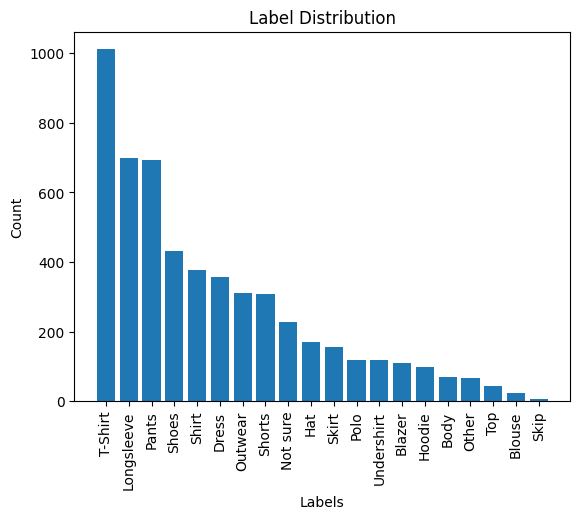

In [22]:
label_counts = data_1['label'].value_counts()

# Plot a bar chart of the label distribution
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Label Distribution')
plt.show()

In [23]:
class_names = list(data_1['label'].unique())
print(len(class_names))
class_names

20


['Not sure',
 'T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Other',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Blouse',
 'Hoodie',
 'Skip',
 'Blazer']

In [24]:
labels_to_remove = ['Skip', 'Not sure', 'Other', 'Blouse']
data_1 = data_1[~data_1['label'].isin(labels_to_remove)]
class_names = list(data_1['label'].unique())
print(len(class_names))
class_names

16


['T-Shirt',
 'Shoes',
 'Shorts',
 'Shirt',
 'Pants',
 'Skirt',
 'Top',
 'Outwear',
 'Dress',
 'Body',
 'Longsleeve',
 'Undershirt',
 'Hat',
 'Polo',
 'Hoodie',
 'Blazer']

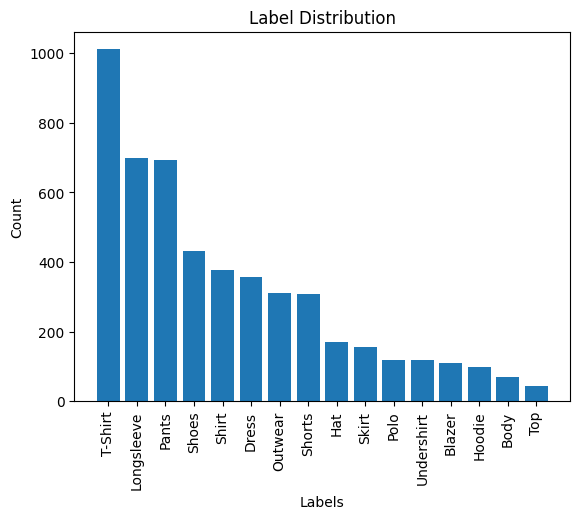

In [25]:
label_counts = data_1['label'].value_counts()

# Plot a bar chart of the label distribution
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Label Distribution')
plt.show()

## Oversampling 

{'T-Shirt': 801, 'Longsleeve': 569, 'Pants': 557, 'Shoes': 334, 'Shirt': 305, 'Dress': 287, 'Outwear': 252, 'Shorts': 249, 'Hat': 139, 'Skirt': 127, 'Undershirt': 98, 'Polo': 96, 'Blazer': 88, 'Hoodie': 79, 'Body': 51, 'Top': 26}
(12816, 1) (12816,)
                                          image
0      b0c6e135-cb26-4d3e-8571-fbf0f8df3f20.jpg
1      cbabc6f4-e6a8-4d02-9027-b746fa2749e4.jpg
2      e5efb687-b679-4af4-af15-80e422716558.jpg
3      0486260d-9355-4958-a7c8-1e672ef27a16.jpg
4      3bc76eb3-1fd9-4244-80f0-e9fcd982c64c.jpg
...                                         ...
12811  f116a69b-3544-4ffd-8d7b-116def60fdab.jpg
12812  28a28fe6-41ff-453a-afb9-d65e822be4ef.jpg
12813  002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg
12814  9779bfcb-6a47-46e3-9b40-16673503f470.jpg
12815  002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg

[12816 rows x 1 columns]
0             Shirt
1        Longsleeve
2        Longsleeve
3           T-Shirt
4             Dress
            ...    
12811    Undershirt
12812   

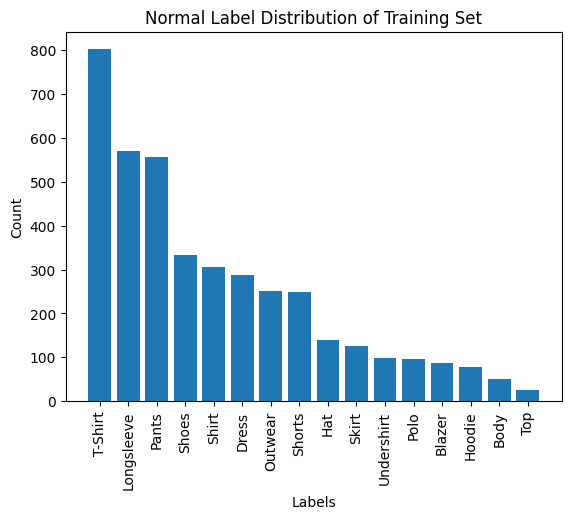

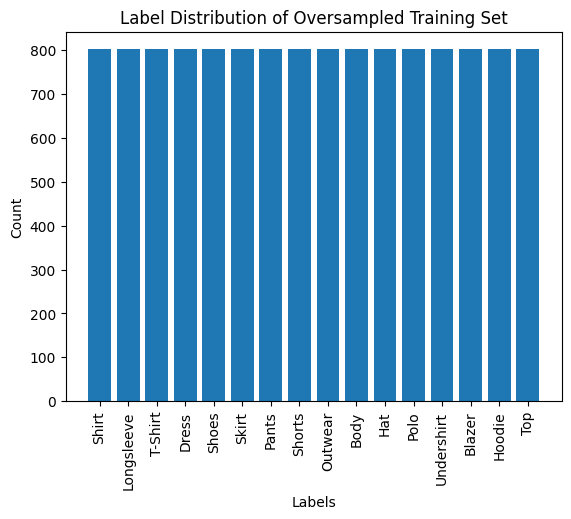

In [30]:
# Count the number of samples in each class for oversampling
train_df, temp_df = train_test_split(data_1, test_size=0.2, random_state=42)
class_counts = train_df['label'].value_counts().to_dict()
print(class_counts)
# Oversample the minority classes in the training set (all except the majority class)
oversampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(train_df[['image']], train_df['label'])
print(X_resampled.shape, y_resampled.shape)
print(X_resampled)
print(y_resampled)
X_resampled_flat = X_resampled.values.reshape(-1)
# Create instances of the dataset and data loaders for oversampled data
oversampled_train_df = pd.DataFrame({'image': X_resampled_flat, 'label': y_resampled})

# Plot a bar chart of the label distribution
label_counts = train_df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Normal Label Distribution of Training Set')
plt.show()

#Plot a bar chart of the label distribution of the oversampled data
label_counts = oversampled_train_df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Label Distribution of Oversampled Training Set')
plt.show()


## Undersampling

{'T-Shirt': 801, 'Longsleeve': 569, 'Pants': 557, 'Shoes': 334, 'Shirt': 305, 'Dress': 287, 'Outwear': 252, 'Shorts': 249, 'Hat': 139, 'Skirt': 127, 'Undershirt': 98, 'Polo': 96, 'Blazer': 88, 'Hoodie': 79, 'Body': 51, 'Top': 26}
(416, 1) (416,)
                                         image
2295  0da0e196-36ab-4d35-bc91-65fcc41ebc66.jpg
2419  59663489-ba1b-40d9-aee0-60a1a412aac5.jpg
3881  6db59125-aec0-4fd7-aca6-337a28277e44.jpg
3177  9e26acec-f047-4039-9c81-eeb2b7bd3dce.jpg
2816  1a35c834-092c-4777-947f-566372c0221d.jpg
...                                        ...
3793  b5856585-87b2-4c0e-904d-9a6fbf549a96.jpg
3710  252b01db-50c1-4ee8-a479-17466634bd85.jpg
3028  60e1d4a5-1d24-493e-90f4-d41642ab53bb.jpg
3264  76b4dcdf-14bb-4114-9a4b-7b0a9307cade.jpg
138   ce507674-9092-4772-9c66-770d0ad18081.jpg

[416 rows x 1 columns]
2295        Blazer
2419        Blazer
3881        Blazer
3177        Blazer
2816        Blazer
           ...    
3793    Undershirt
3710    Undershirt
3028    Unders

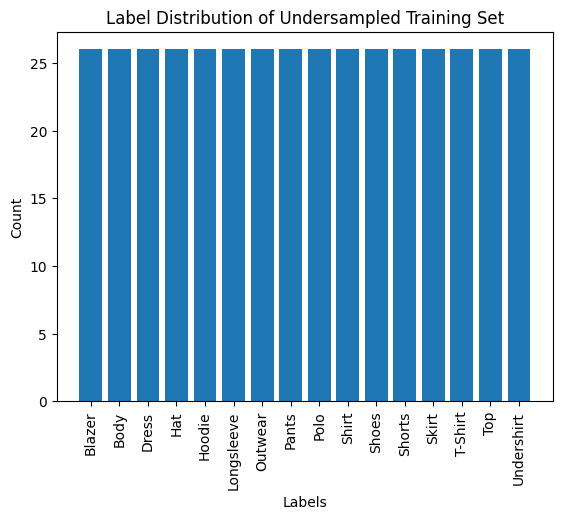

In [29]:
# Undersampling 
class_counts = train_df['label'].value_counts().to_dict()
print(class_counts)
# Undersample the majority classes in the training set (all except the minority class)
undersampler = RandomUnderSampler(sampling_strategy='not minority', random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(train_df[['image']], train_df['label'])
print(X_resampled.shape, y_resampled.shape)
print(X_resampled)
print(y_resampled)
X_resampled_flat = X_resampled.values.reshape(-1)
# Create instances of the dataset and data loaders for undersampled data
undersampled_train_df = pd.DataFrame({'image': X_resampled_flat, 'label': y_resampled})
class_counts_2 = undersampled_train_df['label'].value_counts().to_dict()

# Plot a bar chart of the label distribution
label_counts = undersampled_train_df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Label Distribution of Undersampled Training Set')
plt.show()

## Oversampling + Undersampling

{'T-Shirt': 801, 'Longsleeve': 569, 'Pants': 557, 'Shoes': 334, 'Shirt': 305, 'Dress': 287, 'Outwear': 252, 'Shorts': 249, 'Hat': 139, 'Skirt': 127, 'Undershirt': 98, 'Polo': 96, 'Blazer': 88, 'Hoodie': 79, 'Body': 51, 'Top': 26}
(12816, 1) (12816,)
                                          image
0      b0c6e135-cb26-4d3e-8571-fbf0f8df3f20.jpg
1      cbabc6f4-e6a8-4d02-9027-b746fa2749e4.jpg
2      e5efb687-b679-4af4-af15-80e422716558.jpg
3      0486260d-9355-4958-a7c8-1e672ef27a16.jpg
4      3bc76eb3-1fd9-4244-80f0-e9fcd982c64c.jpg
...                                         ...
12811  f116a69b-3544-4ffd-8d7b-116def60fdab.jpg
12812  28a28fe6-41ff-453a-afb9-d65e822be4ef.jpg
12813  002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg
12814  9779bfcb-6a47-46e3-9b40-16673503f470.jpg
12815  002e88c2-e0ce-4a4b-9670-eddc3d99accc.jpg

[12816 rows x 1 columns]
0             Shirt
1        Longsleeve
2        Longsleeve
3           T-Shirt
4             Dress
            ...    
12811    Undershirt
12812   

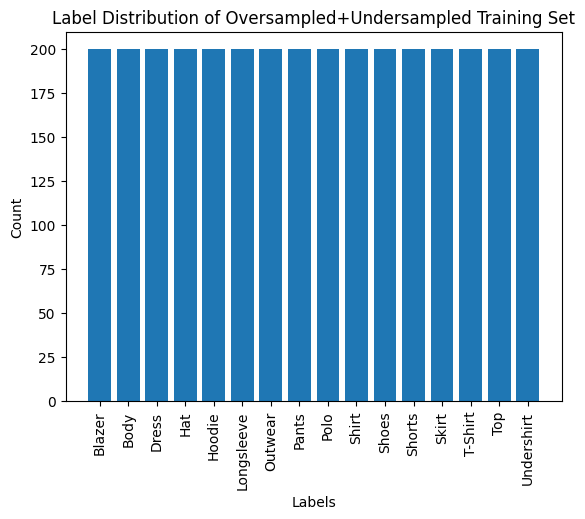

In [31]:
# Count the number of samples in each class for oversampling
class_counts = train_df['label'].value_counts().to_dict()
print(class_counts)

# Oversample the minority classes in the training set 
oversampler = RandomOverSampler(sampling_strategy='not majority', random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(train_df[['image']], train_df['label'])
print(X_resampled.shape, y_resampled.shape)
print(X_resampled)
print(y_resampled)
X_resampled_flat = X_resampled.values.reshape(-1)

# Undersample the majority classes in the training set
undersampler = RandomUnderSampler(sampling_strategy={label: 200 for label in class_counts}, random_state=42)
X_resampled, y_resampled = undersampler.fit_resample(pd.DataFrame({'image': X_resampled_flat}), y_resampled)
print(X_resampled.shape, y_resampled.shape)
print(X_resampled)
print(y_resampled)
X_resampled_flat = X_resampled.values.reshape(-1)

# Create instances of the dataset and data loaders for oversampled and undersampled data
oversampled_and_undersampled_train_df = pd.DataFrame({'image': X_resampled_flat, 'label': y_resampled})

# Plot a bar chart of the label distribution
label_counts = oversampled_and_undersampled_train_df['label'].value_counts()
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.title('Label Distribution of Oversampled+Undersampled Training Set')
plt.show()